# fruits를 KNN으로 분류하기

In [2]:
import pandas as pd
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set과 Target Set을 Numpydml Array로 변경

In [3]:
# 연습 : numpy의 column stack과 row stack

import numpy as np
testA = np.array([1,2,3,4])  # 함수기반이라 ()로 시작
testB = np.array([10,20,30,40])

In [4]:
# 2개의 array를 묶어서 컬럼기반으로 하나의 array로 만들기
combineA = [[i,j] for i, j in zip(testA, testB)]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [6]:
# 다른 방법
combineB = np.column_stack((testA, testB)) # A를 A컬럼으로 B를 B컬럼으로 쌓는다
print(combineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [7]:
combineC = np.row_stack((testA, testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


---


In [20]:
fruits_input = np.column_stack((fruits.length, fruits.weight))
fruits_input

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [38]:
fruits_target = np.array(fruits.name) # np.array로 생성
fruits_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [45]:
# sklearn으로 train test 분류
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
                                fruits_input,
                                fruits_target,
                                stratify=fruits_target
                               )
                                        

In [46]:
# knn으로 학습시키고 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [47]:
# 정확도 출력하기
kn.score(test_input, test_target)

1.0

---
# 수항한 과일?

In [48]:
kn.predict([[25, 150]])

array(['berry'], dtype=object)

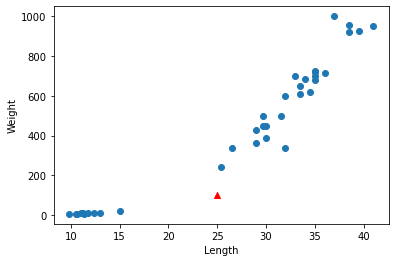

In [50]:
import matplotlib.pylab as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 100, marker='^', c='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


> apple쪽에 가까운것 같은데 berry라니?

In [53]:
# 이웃을 출력해보자
distance, indexes = kn.kneighbors([[25, 150]]) #[] 갯수 조심
print(indexes)

[[ 8 11 20 10 32]]


In [54]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 12.4,  13.4],
        [ 13. ,  12.2],
        [ 11.8,  10. ]]])

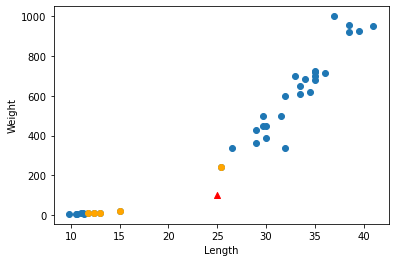

In [57]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 100, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='o', c='orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [58]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'berry']], dtype=object)

---
# 기준을 맞추자

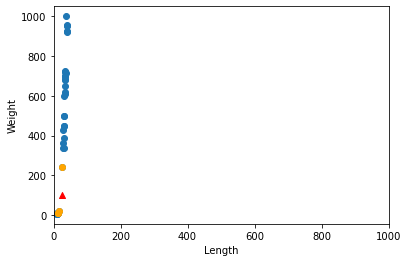

In [60]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 100, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='o', c='orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim(0, 1000)
plt.show()

> sample이 Length에는 거의 영향을 받지 않고 weight에서 영향을 많이 받는다.      
> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는것 같다.

In [62]:
# Length와 Weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.23333333 451.775     ] [ 10.22600172 326.51977767]


> Length와 Weight의 차이가 너무 심하다.     
> 이럴때는 표준화를 사용한다.

---
# train_data를 표준점수(Z점수)로 변경하자
표준점수 = (Feature-평균)/표준편차

In [65]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.17276221, -0.06668815],
       [ 1.19955648,  1.44929965],
       [ 0.7595018 ,  0.83677933],
       [ 0.27055214, -0.00543612],
       [-1.70480446, -1.36308742],
       [ 0.56392193,  0.76021429],
       [ 0.85729173,  0.80309071],
       [ 1.10176655,  1.5411777 ],
       [-0.17928154, -0.64245725],
       [ 0.466132  , -0.3423223 ],
       [-1.39187668, -1.34624311],
       [-1.19629682, -1.32266107],
       [ 0.7595018 ,  0.82146632],
       [ 0.27055214, -0.18919222],
       [ 0.466132  ,  0.45395413],
       [ 0.17276221, -0.27188246],
       [-1.58745654, -1.35389961],
       [ 0.6128169 ,  0.60708421],
       [ 0.7595018 ,  0.76021429],
       [ 0.66171186,  0.71427526],
       [-1.45055064, -1.34256799],
       [ 0.24121516, -0.00543612],
       [ 0.24121516,  0.14769396],
       [-0.07171262, -0.3423223 ],
       [ 0.41723704,  0.14769396],
       [ 0.95508166,  1.67899477],
       [ 1.34624138,  1.52586469],
       [-1.55811956, -1.35696221],
       [-1.63635151,

In [66]:
# sklearn을 이용한 방법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
train_scaled2 = scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.17276221, -0.06668815],
       [ 1.19955648,  1.44929965],
       [ 0.7595018 ,  0.83677933],
       [ 0.27055214, -0.00543612],
       [-1.70480446, -1.36308742]])

### 전처리 데이터로 모델 훈련하기

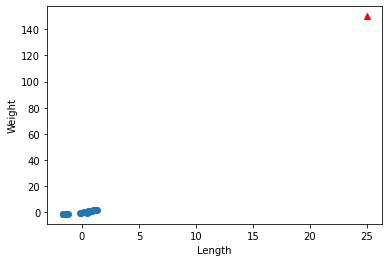

In [68]:
plt.scatter(train_scaled2[:,0], train_scaled2[0:,1])
plt.scatter(25, 150, marker='^', c='red') # 표준화 필요
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

> 예측할 데이터로 표준점수로 변경이 필요

In [70]:
new = ([25, 150] - mean)/std
new

array([-0.21839751, -0.9242166 ])

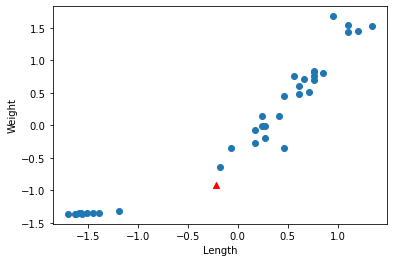

In [71]:
plt.scatter(train_scaled2[:,0], train_scaled2[0:,1])
plt.scatter(new[0],new[1], marker='^', c='red')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# KNN으로 분류

In [72]:
kn.fit(train_scaled2, train_target)

KNeighborsClassifier()

In [73]:
# 검증 데이터도 표준점수로 변경 
# (*** 중요 : 평균과 표준편차는 Train Set에서 구한 값으로 사용한다 - 훈련데이터를 기준으로 검증 데이터를 표준화해야 한다)
test_scaled = (test_input - mean) / std

In [74]:
# 정확도 확인
kn.score(test_scaled, test_target)

1.0

In [75]:
# 수상한 과일을 다시 예측하자
print(kn.predict([new]))

['apple']


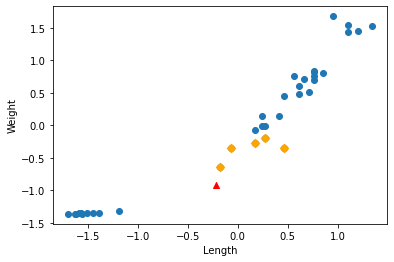

In [77]:
# 확인을 위해 아웃을 출력하자
distance, indexes = kn.kneighbors([new])

plt.scatter(train_scaled2[:,0], train_scaled2[:,1])
plt.scatter(new[0], new[1], marker='^', c='red')
plt.scatter(train_scaled2[indexes,0], train_scaled2[indexes,1], marker='D',c='orange')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()